In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
link = 'https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/Seasons_Stats.csv'
data = pd.read_csv(link, index_col=0)

In [3]:
data

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [4]:
data = data.drop_duplicates()
data

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [5]:
data.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [6]:
#Choose Only 2017
df = data.loc[data.Year == 2017, :].reset_index(drop=True)

In [7]:
df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
3,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
4,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
591,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
592,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
593,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [8]:
#Calculating missing values
df.isnull().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         2
3PAr        2
FTr         2
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        2
USG%        0
blanl     595
OWS         0
DWS         0
WS          0
WS/48       0
blank2    595
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         2
3P          0
3PA         0
3P%        46
2P          0
2PA         0
2P%         5
eFG%        2
FT          0
FTA         0
FT%        24
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [9]:
#Drop Feature that has missing values entire row
df.drop(['blanl', 'blank2'], axis =1, inplace=True)

In [10]:
#Drop duplicate that has the same name
df.drop_duplicates(['Player'],keep='last', inplace=True)

In [11]:
df2 = df[['TS%','3PAr','FTr','TOV%','FG%','3P%','2P%','eFG%','FT%']]

TS%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


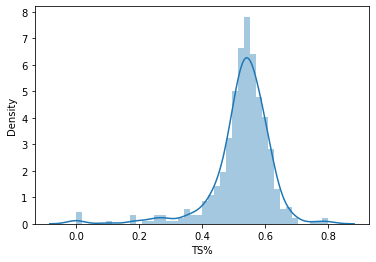

3PAr
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


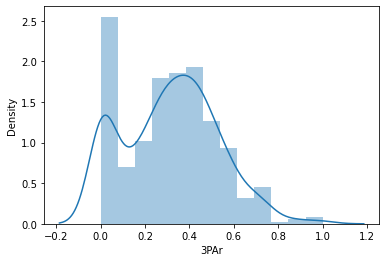

FTr
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


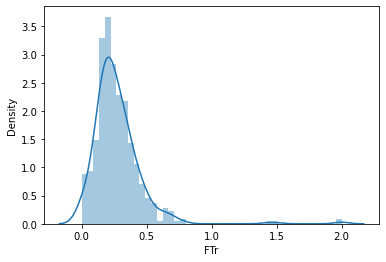

TOV%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


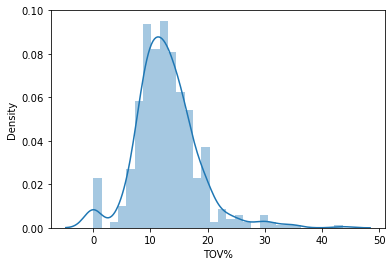

FG%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


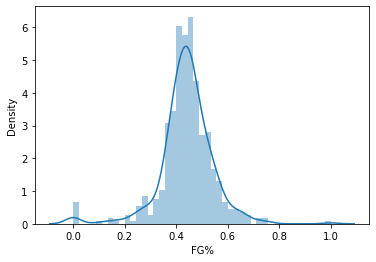

3P%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


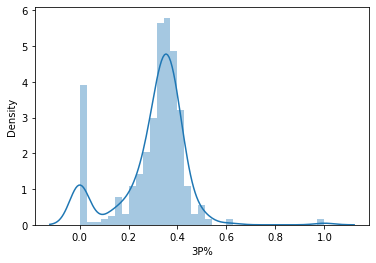

2P%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


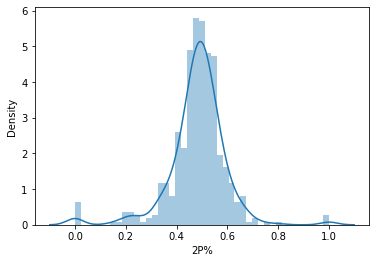

eFG%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


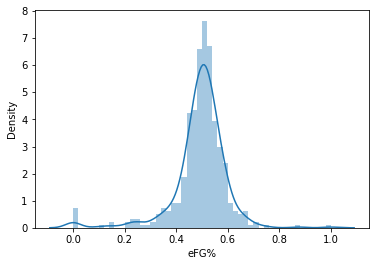

FT%
nan


C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


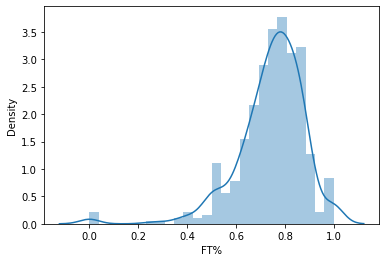

In [13]:
#Generate Skewness
for col in df2:
    print(col)
    print(skew(df2[col]))
    
    plt.figure()
    sns.distplot(df2[col])
    plt.show()

In [14]:
#filling NA with median
df3 = df.fillna(df.median())

In [15]:
#Checking missing values
df3.isnull().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

# NO 1. Who is the youngest and oldest player in the NBA in 2017 for each team (Tm) ?

In [16]:
#Group by tm with max
df3_max_age = df3[['Tm','Player','Age']].groupby("Tm").max().reset_index()

In [17]:
#Sortir from the oldest
df3_max_age.sort_values(by='Age',ascending=False).reset_index(drop=True)

,Tm,Player,Age
0,MEM,Zach Randolph,40.0
1,LAC,Wesley Johnson,39.0
2,SAS,Tony Parker,39.0
3,MIL,Tony Snell,39.0
4,CLE,Tristan Thompson,38.0
5,DAL,Yogi Ferrell,38.0
6,LAL,Tyler Ennis,37.0
7,ATL,Tim Hardaway,36.0
8,OKC,Victor Oladipo,36.0
9,MIA,Willie Reed,36.0


In [18]:
#Group by tm with min
df3_min_age = df3[['Tm','Player','Age']].groupby("Tm").min().reset_index()

In [19]:
#Sortir from the youngest
df3_min_age.sort_values(by='Age').reset_index(drop=True)

,Tm,Player,Age
0,MIL,Gary Payton,19.0
1,SAC,Anthony Tolliver,19.0
2,PHO,Alan Williams,19.0
3,DEN,Alonzo Gee,19.0
4,LAL,Brandon Ingram,19.0
5,LAC,Alan Anderson,19.0
6,MEM,Andrew Harrison,20.0
7,NOP,Alexis Ajinca,20.0
8,MIN,Adreian Payne,20.0
9,MIA,Dion Waiters,20.0


# NO 2. Which player has the most minutes played (MP) in each position (Pos)? 

In [20]:
#Group by Pos with max
df3[['Tm','Player','Pos','MP']].groupby('Pos').max().reset_index()

,Pos,Tm,Player,MP
0,C,WAS,Zaza Pachulia,3030.0
1,PF,WAS,Zach Randolph,2803.0
2,PG,WAS,Yogi Ferrell,2947.0
3,SF,WAS,Wilson Chandler,3048.0
4,SG,WAS,Zach LaVine,2796.0


# NO 3. Which team has the highest average total rebound percentage (TRB%), assist percentage (AST%), steal percentage (STL%), and block percentage (BLK%)? 

In [21]:
#Group by Tm with mean
df3[['Tm','TRB%','AST%','STL%','BLK%']].groupby('Tm').mean().reset_index()

,Tm,TRB%,AST%,STL%,BLK%
0,ATL,9.627778,14.083333,1.438889,1.522222
1,BOS,10.360000,14.573333,1.366667,1.493333
2,BRK,9.894444,13.616667,1.483333,1.444444
3,CHI,9.343750,13.037500,1.543750,1.068750
4,CHO,9.617647,13.888235,1.300000,1.247059
5,CLE,9.668421,11.073684,1.194737,2.568421
6,DAL,10.852632,13.563158,1.536842,1.663158
7,DEN,10.829412,15.723529,1.747059,1.882353
8,DET,10.326667,13.200000,1.260000,1.173333
9,GSW,11.475000,13.943750,1.712500,2.675000


In [22]:
df4 = df3[['Tm','TRB%','AST%','STL%','BLK%']].groupby('Tm').mean().reset_index()

In [23]:
#highlight the max values of each columns.
df4.style.highlight_max(color = 'lightgreen', axis = 0)

,Tm,TRB%,AST%,STL%,BLK%
0,ATL,9.627778,14.083333,1.438889,1.522222
1,BOS,10.360000,14.573333,1.366667,1.493333
2,BRK,9.894444,13.616667,1.483333,1.444444
3,CHI,9.343750,13.037500,1.543750,1.068750
4,CHO,9.617647,13.888235,1.300000,1.247059
5,CLE,9.668421,11.073684,1.194737,2.568421
6,DAL,10.852632,13.563158,1.536842,1.663158
7,DEN,10.829412,15.723529,1.747059,1.882353
8,DET,10.326667,13.200000,1.260000,1.173333
9,GSW,11.475000,13.943750,1.712500,2.675000


# NO 4. Who is the best player in your opinion based on his record stats? note: you can refer to variables point (PTS), assists, rebounds, or anything else. A combination of several variables would be nice. 

In [24]:
#Using numerical values
df5 = df3.drop(['Year','Pos','Age','Tm'], axis = 1)

In [25]:
df5.set_index('Player', inplace=True)

In [26]:
df5

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
Quincy Acy,32.0,1.0,510.0,13.1,0.587,0.542,0.373,3.8,18.2,11.1,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
Steven Adams,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,13.0,15.5,14.2,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
Arron Afflalo,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,0.7,8.4,4.6,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
Alexis Ajinca,39.0,15.0,584.0,12.9,0.529,0.022,0.225,8.3,23.8,16.0,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cody Zeller,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
Tyler Zeller,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
Stephen Zimmerman,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0


In [27]:
#Create column AVG
df5['AVG'] = df5.mean(axis=1)

In [28]:
df5.head()

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AVG
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,67.574489
Quincy Acy,32.0,1.0,510.0,13.1,0.587,0.542,0.373,3.8,18.2,11.1,...,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0,37.999400
Steven Adams,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,13.0,15.5,14.2,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,174.865289
Arron Afflalo,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,0.7,8.4,4.6,...,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0,92.048822
Alexis Ajinca,39.0,15.0,584.0,12.9,0.529,0.022,0.225,8.3,23.8,16.0,...,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0,45.784267


In [29]:
#Filtering the max AVG
df5[df5['AVG'] == df5['AVG'].max()]

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AVG
Player,,,,,,,,,,,,,,,,,,,,,
Russell Westbrook,81.0,81.0,2802.0,30.6,0.554,0.3,0.433,5.4,28.8,17.1,...,137.0,727.0,864.0,840.0,133.0,31.0,438.0,190.0,2558.0,360.796867


# NO 5. Which team has the best average stat record of their players? Note: you can refer to points, assists, rebounds, or anything else. A combination of several variables would be nice

In [30]:
#Using numerical values
df6 = df3.drop(['Year','Pos','Age','Player'], axis = 1)

In [31]:
df6

,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,1.9,7.1,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
3,BRK,32.0,1.0,510.0,13.1,0.587,0.542,0.373,3.8,18.2,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
4,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,13.0,15.5,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
5,SAC,61.0,45.0,1580.0,9.0,0.559,0.360,0.221,0.7,8.4,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
6,NOP,39.0,15.0,584.0,12.9,0.529,0.022,0.225,8.3,23.8,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
591,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
592,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
593,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [32]:
#Group by Tm with mean
df6 = df6.groupby('Tm').mean()

In [33]:
#Creat column AVG
df6['AVG'] = df6.mean(axis=1)

In [34]:
df6.sort_values(by='AVG',ascending=False)

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AVG
Tm,,,,,,,,,,,,,,,,,,,,,
MIA,54.928571,28.500000,1385.857143,12.964286,0.523857,0.324857,0.244000,5.000000,15.221429,10.057143,...,61.214286,189.214286,250.428571,123.428571,41.214286,33.142857,72.785714,117.642857,593.714286,104.360095
LAC,57.600000,27.333333,1316.933333,13.500000,0.529267,0.310400,0.272067,4.600000,16.280000,10.586667,...,49.333333,186.000000,235.333333,123.200000,40.866667,23.266667,68.266667,108.400000,594.066667,100.492467
BOS,59.466667,27.333333,1316.933333,14.780000,0.560333,0.350733,0.330867,5.513333,15.160000,10.360000,...,49.600000,179.866667,229.466667,137.933333,41.133333,22.733333,69.133333,112.400000,590.466667,100.482653
MIN,53.400000,27.333333,1315.866667,12.766667,0.509267,0.263000,0.233333,5.753333,13.700000,9.680000,...,62.533333,168.666667,231.200000,129.000000,43.600000,24.666667,73.000000,109.600000,575.733333,99.938986
POR,56.714286,25.428571,1315.357143,13.164286,0.540929,0.340214,0.254429,5.107143,15.621429,10.357143,...,50.714286,174.071429,224.785714,108.500000,37.428571,24.642857,70.571429,113.357143,589.571429,99.723279
DET,56.666667,27.333333,1320.400000,13.053333,0.494867,0.284400,0.212933,5.180000,15.893333,10.326667,...,60.533333,189.200000,249.733333,115.400000,38.266667,20.666667,62.133333,97.800000,553.933333,99.467941
GSW,59.937500,25.625000,1233.375000,15.125000,0.569125,0.238875,0.322250,6.818750,15.575000,11.475000,...,48.187500,179.312500,227.500000,155.312500,48.875000,34.625000,73.687500,98.812500,593.187500,98.496415
HOU,47.933333,26.800000,1230.000000,14.000000,0.561600,0.417800,0.280933,5.326667,13.726667,9.520000,...,57.400000,174.333333,231.733333,131.400000,41.333333,22.133333,74.600000,98.466667,605.200000,98.163388
UTA,58.800000,27.333333,1317.066667,14.500000,0.550600,0.304733,0.274000,4.900000,15.586667,10.386667,...,51.400000,184.933333,236.333333,110.066667,36.666667,27.333333,70.733333,103.000000,550.533333,97.133293


In [35]:
#Filtering the max AVG
df6[df6['AVG'] == df6['AVG'].max()]

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AVG
Tm,,,,,,,,,,,,,,,,,,,,,
MIA,54.928571,28.5,1385.857143,12.964286,0.523857,0.324857,0.244,5.0,15.221429,10.057143,...,61.214286,189.214286,250.428571,123.428571,41.214286,33.142857,72.785714,117.642857,593.714286,104.360095
